# Computational Photography
## Ray Tracing
Duke Kunshan University Fall 2017
David Brady

Monday 6 November 2017


Cameras use lenses to cause optical rays eminating from an object point to hit an image point. Lenses may include of curved refractive surfaces or curved reflecting surface.

Here we explore the function of a lens using https://github.com/quartiq/rayopt conda install -c https://conda.anaconda.org/jordens/channel/ci rayopt

To use this software you need a python2 kernel
you can add a python2 kernel by typing
 
 conda create -n python2 python=2.7 anaconda
 
 in the anaconda terminal window. You then also need to type
 
 conda install -n python2 -c https://conda.anaconda.org/jordens/channel/ci rayopt


In [4]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [5]:
s = ro.system_from_yaml("""
object:
  pupil:
    radius: 1
elements:
- {}
- {distance: 1, material: 1.5, roc: 5, radius: 1}
- {distance: .2, material: 1.0}
- {}
""")
s.update()
print(s)

System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Semi-Angle: 0 deg
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -0.133333
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2                 -   1.500   1.500     inf
 2 S        0.2        inf        inf                 -   1.000   1.000     inf
 3 S          0        inf        inf              None     nan     nan     nan



System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0
Object:
 Semi-Angle: 0 deg
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -0.133333
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2                 -   1.500   1.500     inf
 2 S        0.2        inf        inf                 -   1.000   1.000     inf
 3 S     9.7839        inf        inf              None     nan     nan     nan

lagrange: -0
track length: 0.2
object, image height: [ 0.  0.]
front, back focal length (from PP): [ nan  nan]
entry, exit pupil height: [ nan  nan]
entry, exit pupil distance: [ nan  nan]
front, back focal distance: [ nan  nan]
front, back principal distance: [ nan  nan]
front, back nodal distance: [ nan  nan]
front, back numerical 

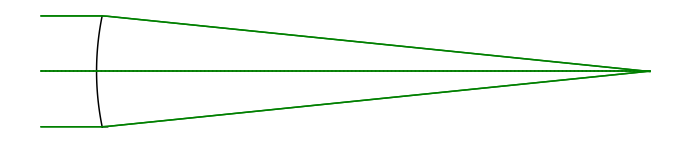

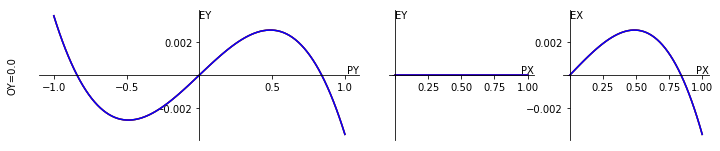

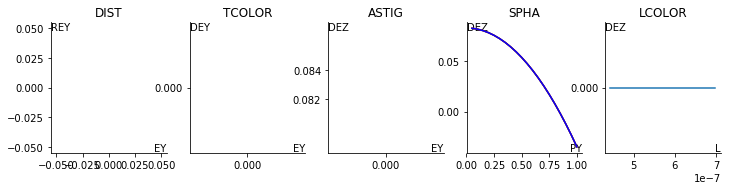

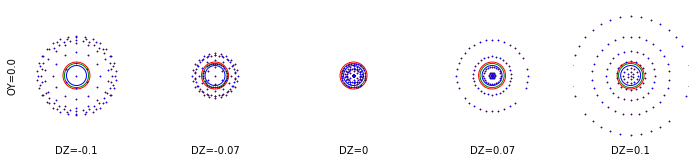

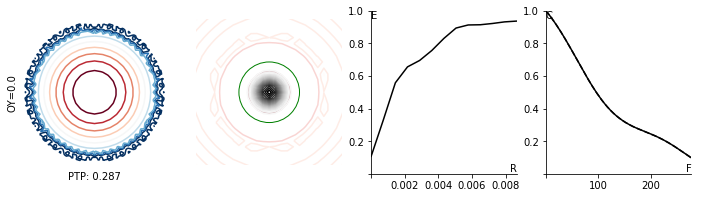

In [6]:
ro.Analysis(s)

In [7]:
lib = ro.Library.one()
for g in lib.session.query(
    ro.library.Material).filter(
    ro.library.Material.name.contains("N-BK7")):
    print(g.name, g.catalog.name, g.catalog.source)

(u'SCHOTT-BK|N-BK7', u'glass', u'rii')
(u'SCHOTT-BK|N-BK7HT', u'glass', u'rii')


System: 
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 5 deg
 Pupil:
   Pupil Distance: 1
   Radius: 1
Image:
 Radius: 0.894
 Update Radius: True
 Pupil:
   Pupil Distance: -9.67492
   Update Radius: True
   Radius: 1
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf              None     nan     nan     nan
 1 S          1          5          2 glass/SCHOTT-BK|N-BK7   1.517   1.517   64.17
 2 S        0.2        inf          2                 -   1.000   1.000     inf
 3 S     9.4626        inf      1.787              None     nan     nan     nan

lagrange: -0.087601
track length: 0.2
object, image height: [ 0.0876  0.8475]
front, back focal length (from PP): [-9.6749  9.6749]
entry, exit pupil height: [ 1.  1.]
entry, exit pupil distance: [-0.     -0.1319]
front, back focal distance: [-9.6749  9.5431]
front, back principal distance: [ 0.     -0.1319]
front, back 

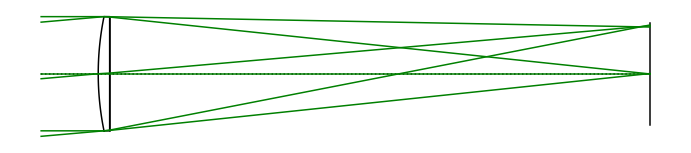

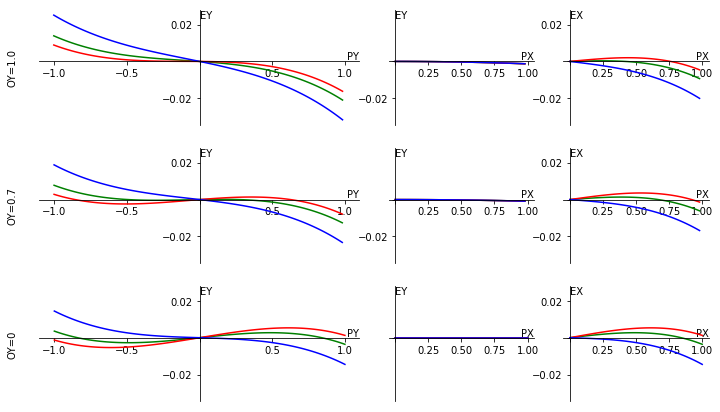

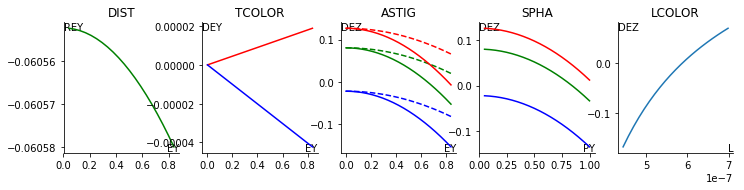

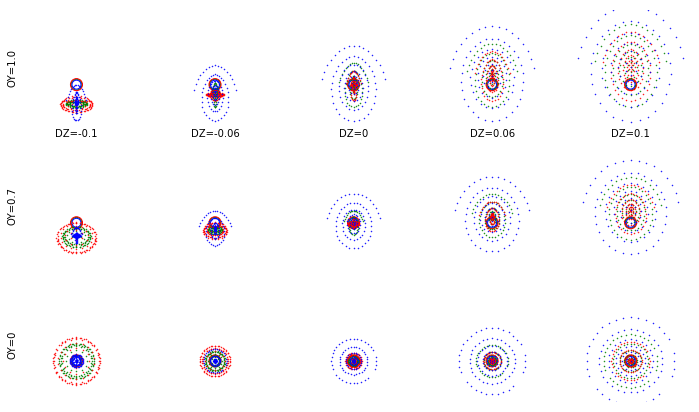

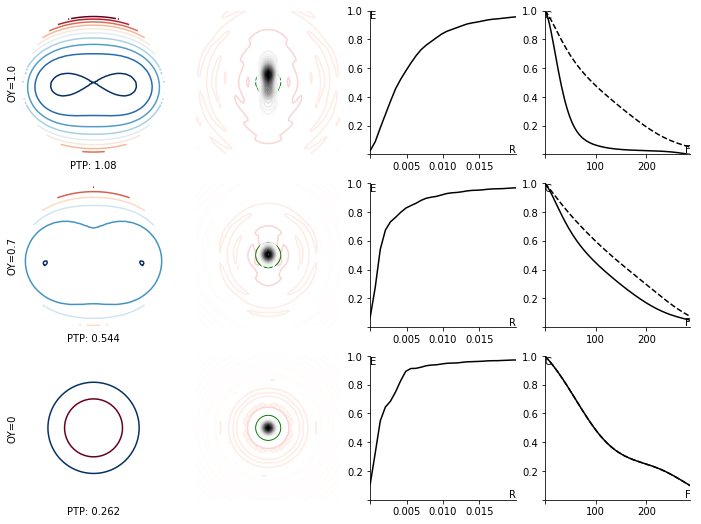

In [8]:
s[1].material = lib.get("material", "SCHOTT-BK|N-BK7", source="rii")
s.object.angle = np.deg2rad(5)
s.fields = 0, .7, 1.
s.update()
s.paraxial.resize()
s.resize_convex()
s.paraxial.refocus()
ro.Analysis(s)

In [9]:
help(ro)

Help on package rayopt:

NAME
    rayopt

FILE
    /home/dbrady/anaconda3/envs/python2/lib/python2.7/site-packages/rayopt/__init__.py

DESCRIPTION
    # -*- coding: utf-8 -*-
    #
    #   rayopt - raytracing for optical imaging systems
    #   Copyright (C) 2012 Robert Jordens <jordens@phys.ethz.ch>
    #
    #   This program is free software: you can redistribute it and/or modify
    #   it under the terms of the GNU Lesser General Public License as published by
    #   the Free Software Foundation, either version 3 of the License, or
    #   (at your option) any later version.
    #
    #   This program is distributed in the hope that it will be useful,
    #   but WITHOUT ANY WARRANTY; without even the implied warranty of
    #   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    #   GNU Lesser General Public License for more details.
    #
    #   You should have received a copy of the GNU Lesser General Public License
    #   along with this program.  If not, see <